In [1]:
#!pip install autoscraper

In [2]:
from autoscraper import AutoScraper

In [3]:
url = 'https://www.flipkart.com/apple-2020-macbook-air-m1-8-gb-256-gb-ssd-mac-os-big-sur-mgn63hn-a/product-reviews/itm3c872f9e67bc6?pid=COMFXEKMGNHZYFH9&lid=LSTCOMFXEKMGNHZYFH9P56X45&marketplace=FLIPKART'
review = ('Value for money product...')
wanted_list=['Wonderful','Just love it, dream comes true😎']


In [4]:
scraper = AutoScraper()
result = scraper.build(url,wanted_list)
print(result)

['Good choice', 'Value-for-money', 'Brilliant', 'Excellent', 'Classy product', 'Great product', 'Simply awesome', 'Wonderful', "Value for money product...But no one said this major issue on every mac. If I touch or rub the mac body while charging, I can feel some electric sensation passing through my body.. when I searched about the issue, this issue has existed for the last 10 years on all mac devices because of 2 pin chargers without ground. This issue can be resolved only with a 3 pin charger with ground. This issue should be resolved by mac providing 3 pin charger but they didn't care about this issue. We should...", "A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms of overall performance,  it is far beyond what windows laptops can offer in same segment.I won't compare it with windows laptops as we all are aware of it. This is more about M1 chip. People are worried about buyin

In [5]:
scraper.get_result_similar(url,grouped=True)

{'rule_c8u2': ['Good choice',
  'Value-for-money',
  'Brilliant',
  'Excellent',
  'Brilliant',
  'Classy product',
  'Great product',
  'Simply awesome',
  'Great product',
  'Wonderful'],
 'rule_el46': ["Value for money product...But no one said this major issue on every mac. If I touch or rub the mac body while charging, I can feel some electric sensation passing through my body.. when I searched about the issue, this issue has existed for the last 10 years on all mac devices because of 2 pin chargers without ground. This issue can be resolved only with a 3 pin charger with ground. This issue should be resolved by mac providing 3 pin charger but they didn't care about this issue. We should...",
  "A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms of overall performance,  it is far beyond what windows laptops can offer in same segment.I won't compare it with windows laptops as we

In [7]:
scraper.set_rule_aliases({'rule_el46':'reviews'})
scraper.keep_rules(['rule_el46'])
scraper.save("Reviews_txt")

In [8]:
result1 = scraper.get_result_similar(url,group_by_alias=True)

In [9]:
Reviews1=result1['reviews']

Emotion mining

In [10]:
reviews = [x.strip() for x in Reviews1]
reviews = [x for x in Reviews1 if x]
reviews[:10]

["Value for money product...But no one said this major issue on every mac. If I touch or rub the mac body while charging, I can feel some electric sensation passing through my body.. when I searched about the issue, this issue has existed for the last 10 years on all mac devices because of 2 pin chargers without ground. This issue can be resolved only with a 3 pin charger with ground. This issue should be resolved by mac providing 3 pin charger but they didn't care about this issue. We should...",
 "A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms of overall performance,  it is far beyond what windows laptops can offer in same segment.I won't compare it with windows laptops as we all are aware of it. This is more about M1 chip. People are worried about buying M1 version because of compatibility issues.Don't worry, this processor is so powerful and in terms of compatibility, this .

In [11]:
text = ' '.join(reviews)
text

"Value for money product...But no one said this major issue on every mac. If I touch or rub the mac body while charging, I can feel some electric sensation passing through my body.. when I searched about the issue, this issue has existed for the last 10 years on all mac devices because of 2 pin chargers without ground. This issue can be resolved only with a 3 pin charger with ground. This issue should be resolved by mac providing 3 pin charger but they didn't care about this issue. We should... A bit expensive when we compare with  today's intel (11th gen) or AMD (Ryzen 5th gen) based windows Laptops with RTX 30 Graphics but this Apple M1 in terms of overall performance,  it is far beyond what windows laptops can offer in same segment.I won't compare it with windows laptops as we all are aware of it. This is more about M1 chip. People are worried about buying M1 version because of compatibility issues.Don't worry, this processor is so powerful and in terms of compatibility, this ... Be

In [12]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[5:15] 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This is more about M1 chip.',
 "People are worried about buying M1 version because of compatibility issues.Don't worry, this processor is so powerful and in terms of compatibility, this ... Best in class laptop ❤️💫 About  me (type of consumer): moved from windows to Apple after 8 years !",
 'Never buyed a laptop !',
 "Best transition stage.Being practical I always don't wanted to move to Apple instead going for windows in that or less price , but apple did its job ,this time not just the branding but the performance at its best .Coder review : Performance : 10/10I used android studio , u can easily run the emulator ,no lagFrom editing videos to multitaskig 30 apps at a time , M1 is the beat one mach... Best device ever .I love it...",
 'Fantastic value for money machine!!',
 'Absolute beast as far as sheer performance is concerned that being super efficient on the battery.',
 '1.',
 'Using it mainly for coding purposes, browsing and all that regular stuff.',
 'Haven’t played any game

In [13]:
import pandas as pd 
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Value for money product...But no one said this...
1,"If I touch or rub the mac body while charging,..."
2,This issue can be resolved only with a 3 pin c...
3,This issue should be resolved by mac providing...
4,We should... A bit expensive when we compare w...
5,This is more about M1 chip.
6,People are worried about buying M1 version bec...
7,Never buyed a laptop !
8,Best transition stage.Being practical I always...
9,Fantastic value for money machine!!


In [14]:
positive_words = ["love", "amazing", "awesome"]
negative_words = ["hate", "dislike", "terrible"]

In [15]:
def map_sentiment_category(score):
    if score > 0.2:
        return 1  
    elif score < -0.2:
        return -1  
    else:
        return 0  

In [16]:
from textblob import TextBlob
def calculate_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

In [17]:
sent_df['sentiment_score'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value'] = sent_df['sentiment_score'].apply(map_sentiment_category)

In [18]:
sent_df

,sentence,sentiment_score,sentiment_value
0,Value for money product...But no one said this...,0.062500,0
1,"If I touch or rub the mac body while charging,...",0.000000,0
2,This issue can be resolved only with a 3 pin c...,0.000000,0
3,This issue should be resolved by mac providing...,0.000000,0
4,We should... A bit expensive when we compare w...,-0.030000,0
5,This is more about M1 chip.,0.500000,1
6,People are worried about buying M1 version bec...,0.650000,1
7,Never buyed a laptop !,0.000000,0
8,Best transition stage.Being practical I always...,0.627778,1
9,Fantastic value for money machine!!,0.625000,1


In [19]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_score,sentiment_value,word_count
0,Value for money product...But no one said this...,0.062500,0,13
1,"If I touch or rub the mac body while charging,...",0.000000,0,46
2,This issue can be resolved only with a 3 pin c...,0.000000,0,13
3,This issue should be resolved by mac providing...,0.000000,0,18
4,We should... A bit expensive when we compare w...,-0.030000,0,59
5,This is more about M1 chip.,0.500000,1,6
6,People are worried about buying M1 version bec...,0.650000,1,43
7,Never buyed a laptop !,0.000000,0,5
8,Best transition stage.Being practical I always...,0.627778,1,79
9,Fantastic value for money machine!!,0.625000,1,5


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

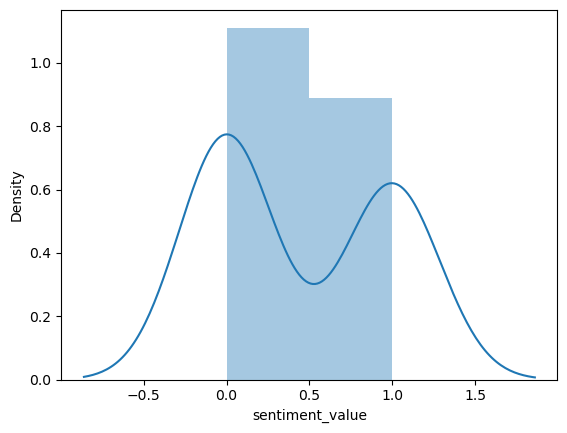

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

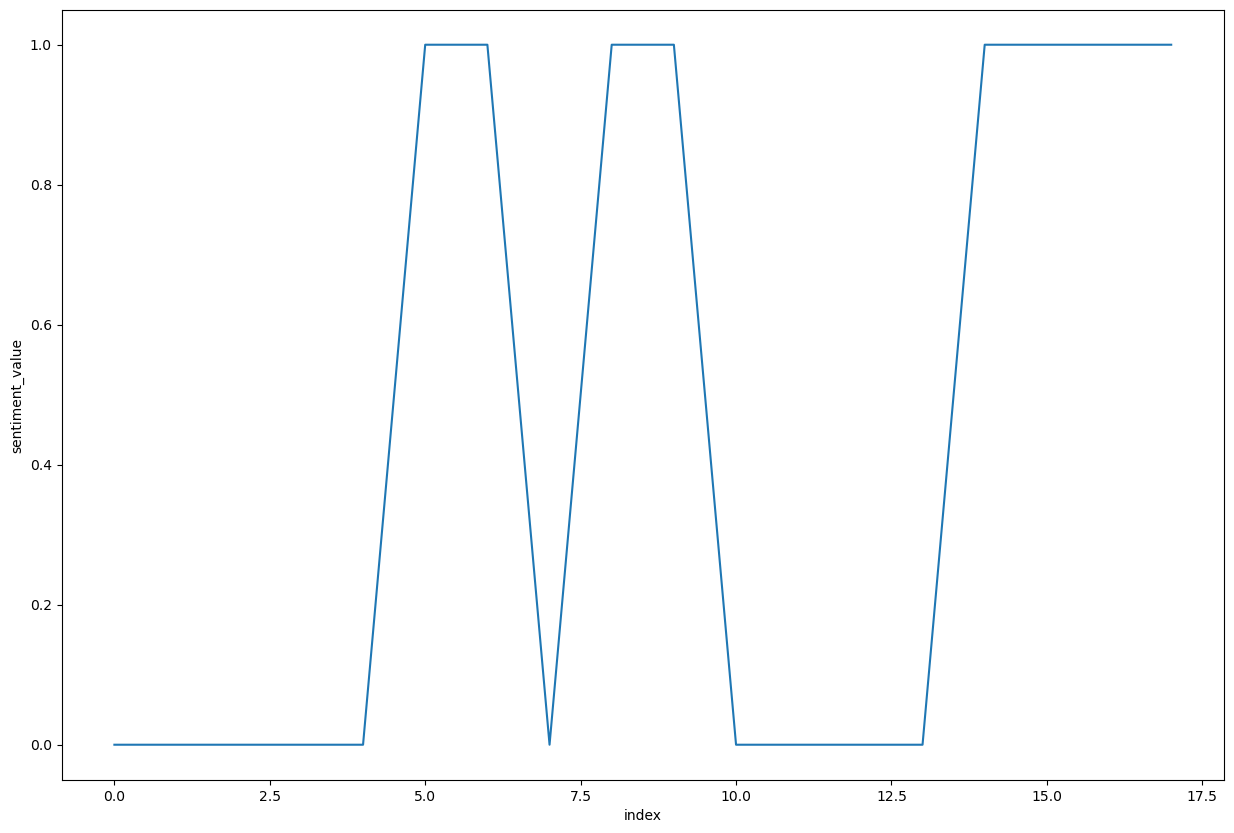

In [21]:
sent_df.reset_index(inplace=True)
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

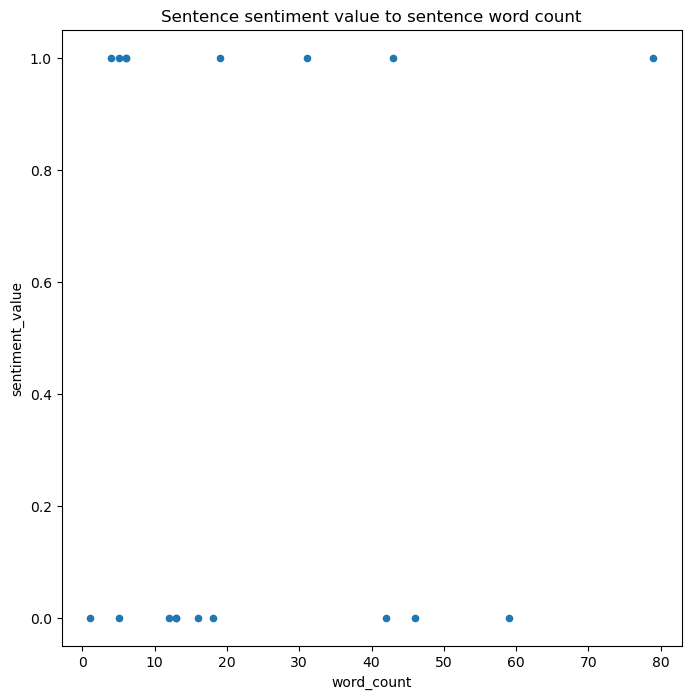

In [22]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off"); 

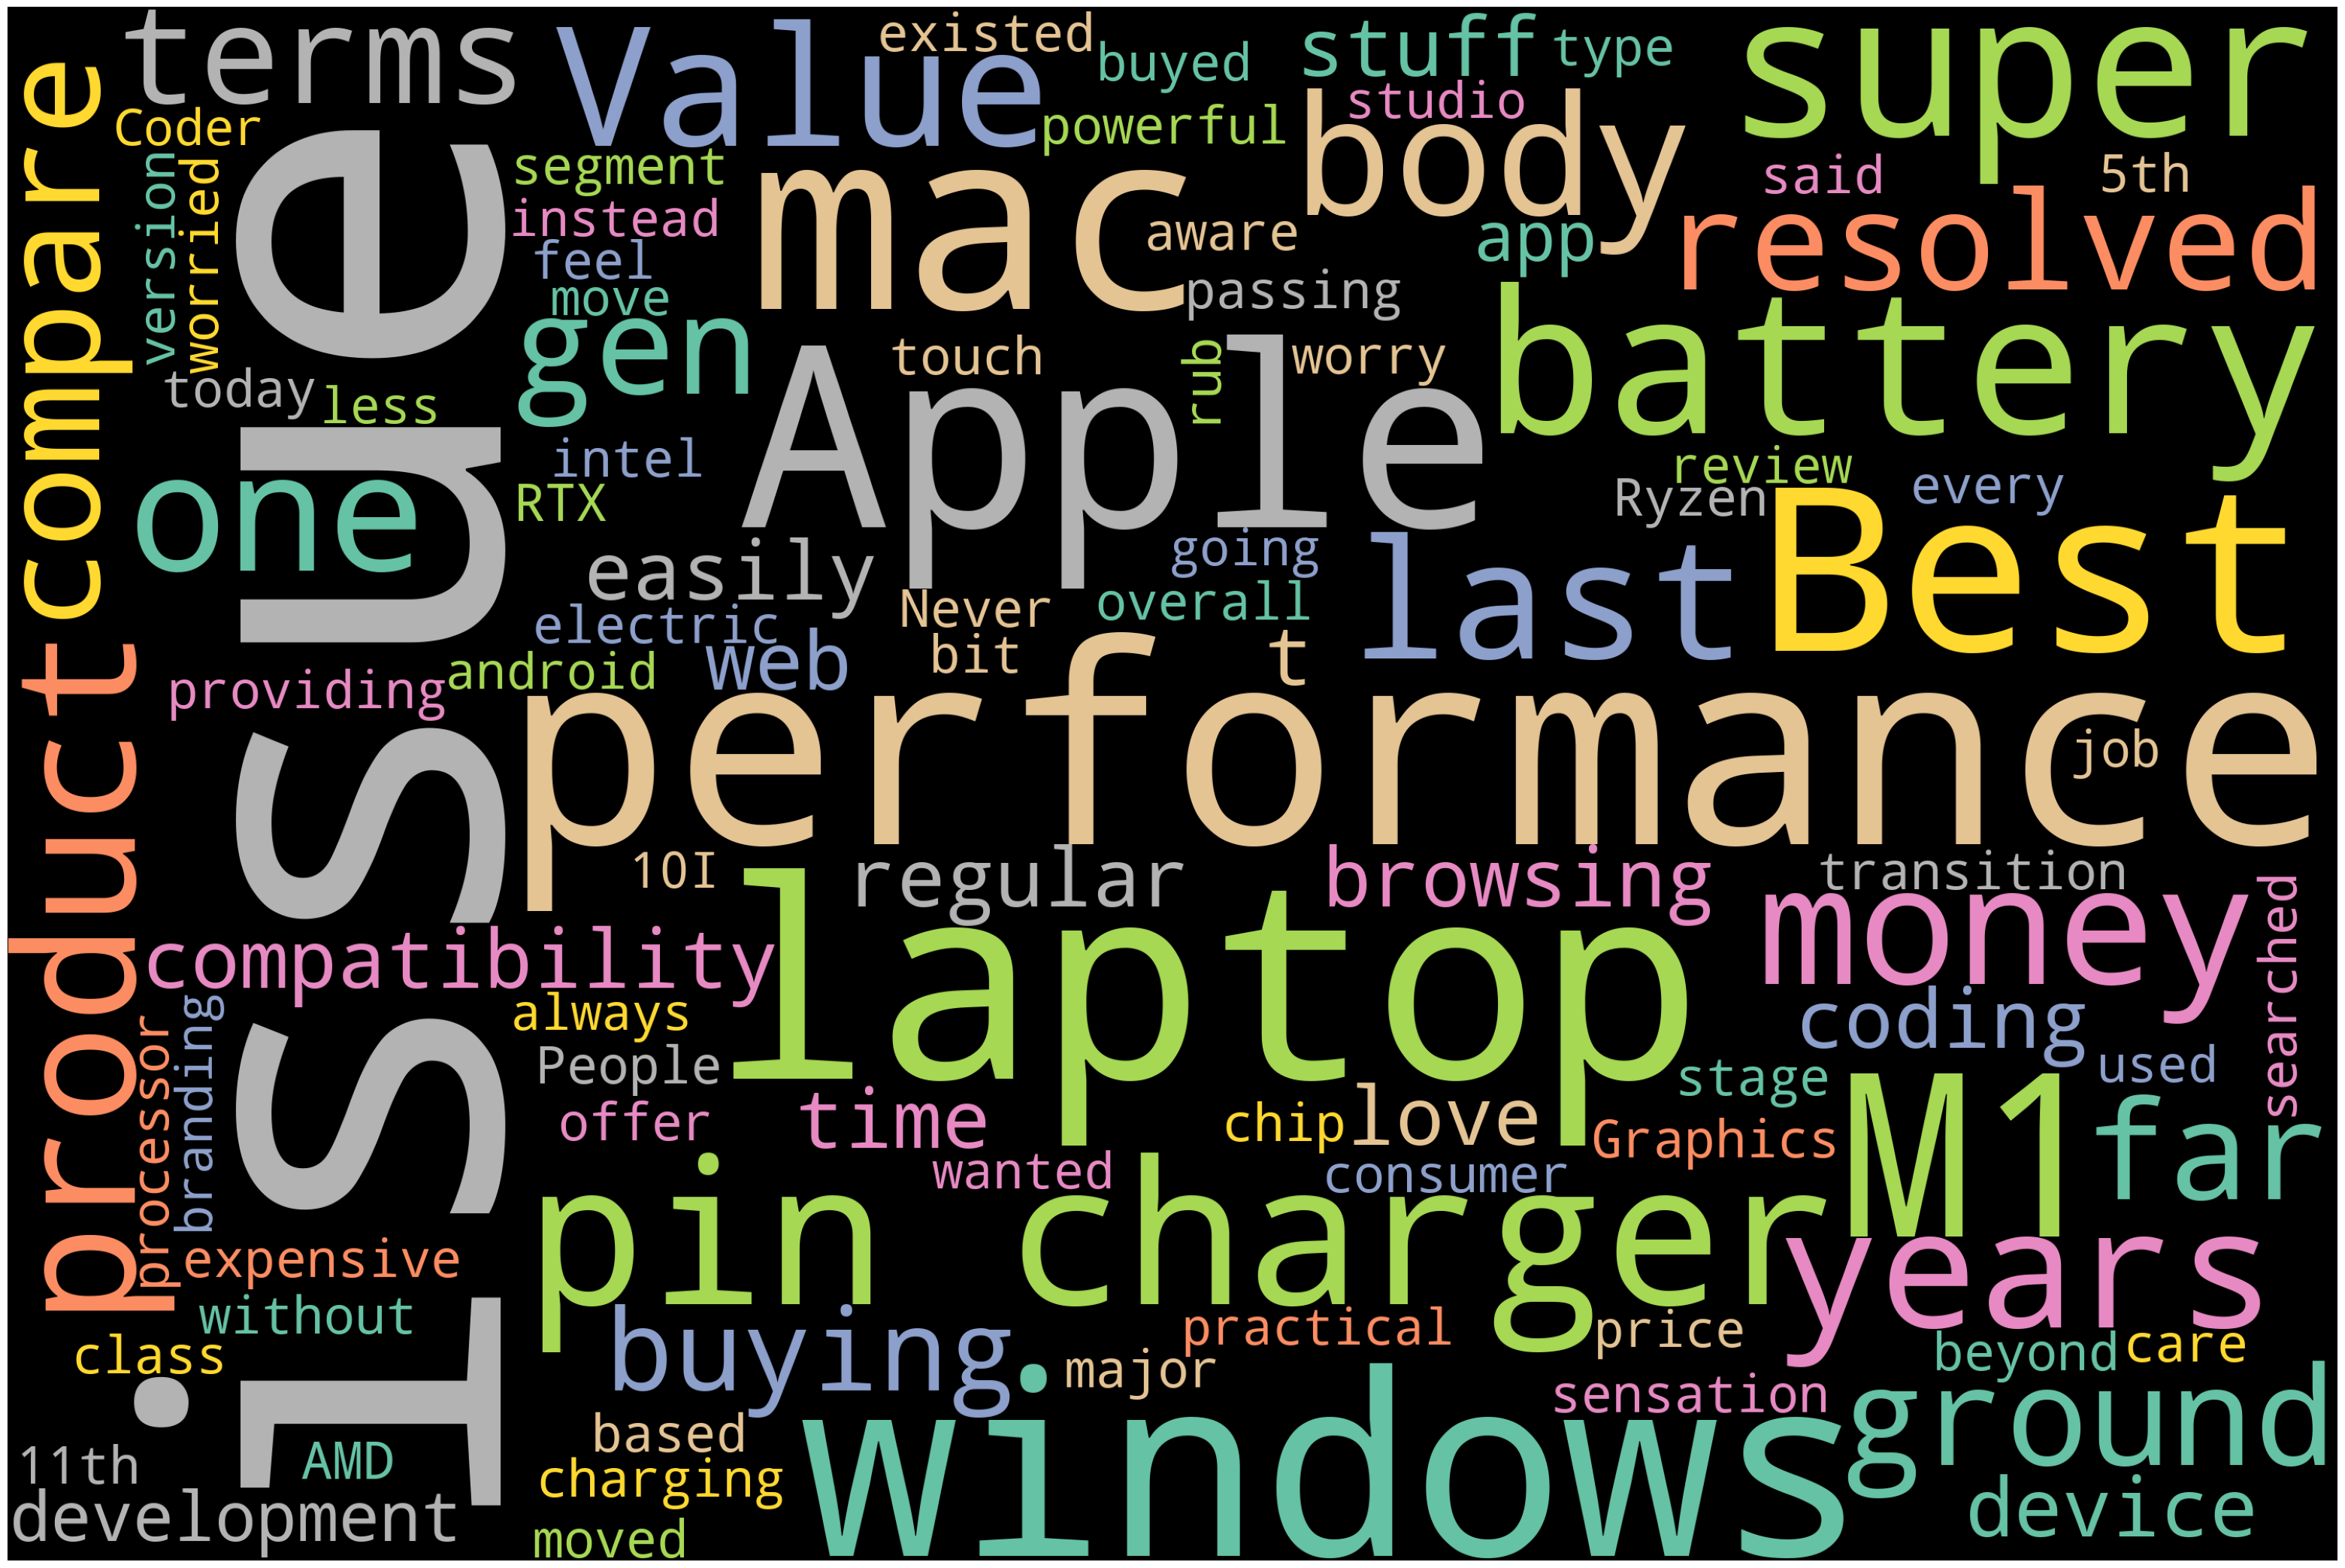

In [24]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)

plot_cloud(wordcloud)